## nheatmap

## Load library

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import sklearn.decomposition, sklearn.cluster
from nheatmap import nhm, scripts
import matplotlib.pyplot as plt
import matplotlib as mpl

## Generate Data

In [2]:
df = scripts.simulate_data(nrows=120)
nrows, ncols = np.shape(df)
pc = sklearn.decomposition.PCA().fit(df)
dfr = pd.DataFrame(pc.transform(df)[:, 0], index=['sample '+str(x) for x in np.arange(1, nrows+1)],
        columns=['PC1'])
dfr['cell cluster'] = sklearn.cluster.KMeans(n_clusters=20).fit_predict(df).astype(str)
dfc = pd.DataFrame(pc.components_[0], index=['gene '+str(x) for x in
    np.arange(1, ncols+1)], columns=['PC score'])
dfc['gene cluster'] = sklearn.cluster.KMeans(n_clusters=10).fit_predict(df.T).astype(str)
dfc['PC score 2'] = pc.components_[1]
## Here we make a smaller subset of the larger data
dfsmall = df.iloc[:20, :10]
dfrsmall = dfr.iloc[:20]
dfcsmall = dfr.iloc[:10]

### Inspect the structure of the data

In [3]:
df.head()

,gene 1,gene 2,gene 3,gene 4,gene 5,gene 6,gene 7,gene 8,gene 9,gene 10,...,gene 51,gene 52,gene 53,gene 54,gene 55,gene 56,gene 57,gene 58,gene 59,gene 60
sample 1,1.541265,6.682839,1.942021,3.027325,2.493272,6.746455,0.956924,6.676999,8.258879,0.426302,...,2.400611,0.794901,0.409340,2.756031,2.350794,2.090104,6.661980,7.700250,3.031051,3.330230
sample 2,1.766774,6.713534,8.662776,6.661142,2.459759,2.181657,3.184508,7.690090,2.297444,2.823777,...,1.271239,2.347096,3.111738,3.063332,6.712203,7.689867,2.984033,1.970769,2.643763,0.854186
sample 3,2.064316,6.774560,3.094330,6.702190,6.774595,1.051236,7.677424,6.658818,6.684512,2.506079,...,3.226522,2.116188,3.042267,3.417509,2.917441,0.787075,2.998751,1.815984,7.698864,6.749989
sample 4,7.719215,2.465415,3.427567,6.659259,1.900599,7.670063,0.787695,8.275954,7.678198,6.754058,...,3.305797,3.431036,0.260944,2.642269,1.952017,3.427509,1.911323,2.309014,2.926326,6.788986
sample 5,2.258646,3.403211,6.698495,2.294971,6.668095,2.472988,2.636102,6.727733,6.696793,2.582852,...,0.941076,2.008601,0.979905,2.023550,2.493874,2.223485,2.174270,1.877140,0.146285,6.778770


In [4]:
dfr.head()

,PC1,cell cluster
sample 1,-2.503917,13
sample 2,-2.158174,8
sample 3,-2.820791,15
sample 4,-1.726298,1
sample 5,-0.442220,8


In [5]:
dfc.head()

,PC score,gene cluster,PC score 2
gene 1,-0.021236,1,0.146338
gene 2,-0.071344,1,0.209788
gene 3,-0.084353,8,0.192639
gene 4,-0.085234,8,0.198752
gene 5,-0.047735,8,0.201455


### Define the colormaps for each column key (optional)

In [ ]:
cmaps={'cell cluster':'Paired', 'PC1':'RdYlGn', 'gene cluster':'inferno',
        'PC score':'gist_heat', 'PC score 2':'rainbow'}

## Make some plots

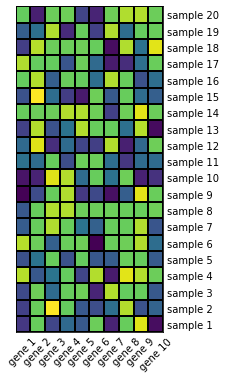

In [6]:
g = nhm(data=dfsmall)
fig, plots = g.run()

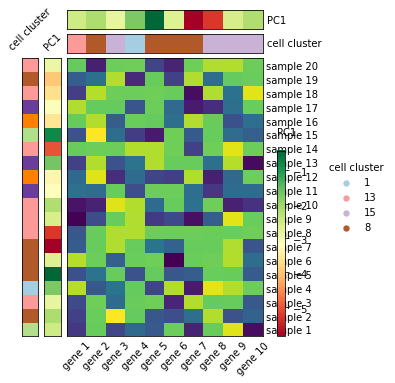

In [7]:
g = nhm(data=dfsmall, dfr=dfrsmall, dfc=dfcsmall, figsize=(6, 6), linewidths=0, cmaps=cmaps)
fig, plots = g.run()

### Having the ytick show is a little annoying, so let's hide it.

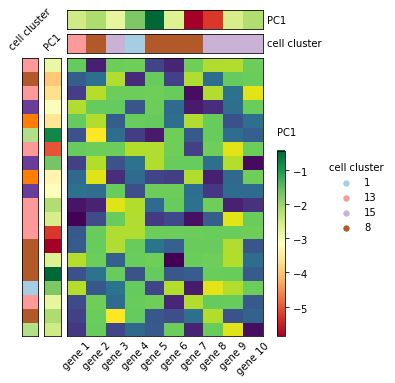

In [10]:
g = nhm(data=dfsmall, dfr=dfrsmall, dfc=dfcsmall, figsize=(6, 6), linewidths=0, cmaps=cmaps, showyticks=False)
fig, plots = g.run()

### Let's plot the larger dataframe and show all the colorbar and legends.

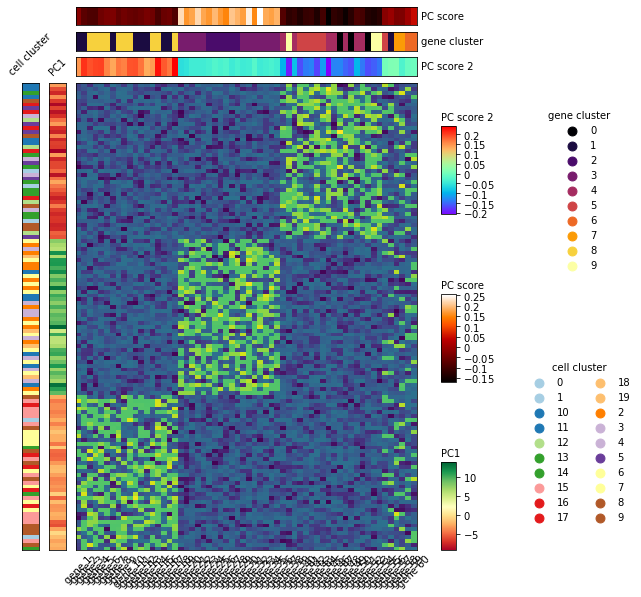

In [8]:
g = nhm(data=df, dfr=dfr, dfc=dfc, figsize=(10, 10), linewidths=0, cmaps=cmaps)
fig, plots = g.run()

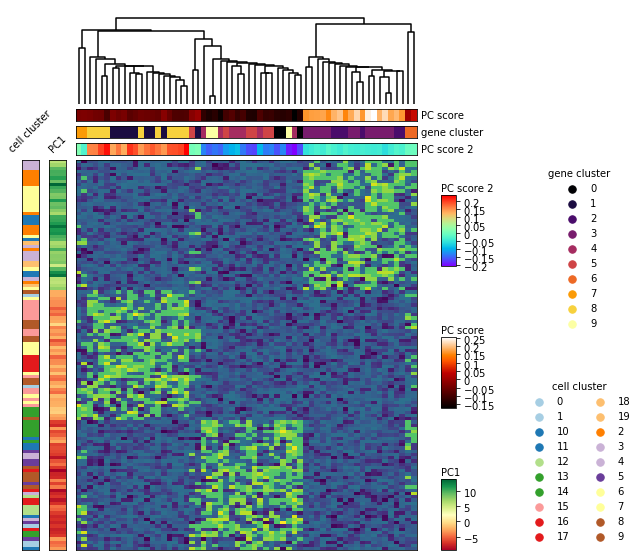

In [9]:
g = nhm(data=df, dfr=dfr, dfc=dfc, figsize=(10, 10), linewidths=0, cmaps=cmaps, showxticks=False)
g.hcluster(showRdendrogram=False)
fig, plots = g.run()

### Add additional meta-column in real-time

In [11]:
dfc['New metadata'] = np.random.rand(dfc.shape[0])

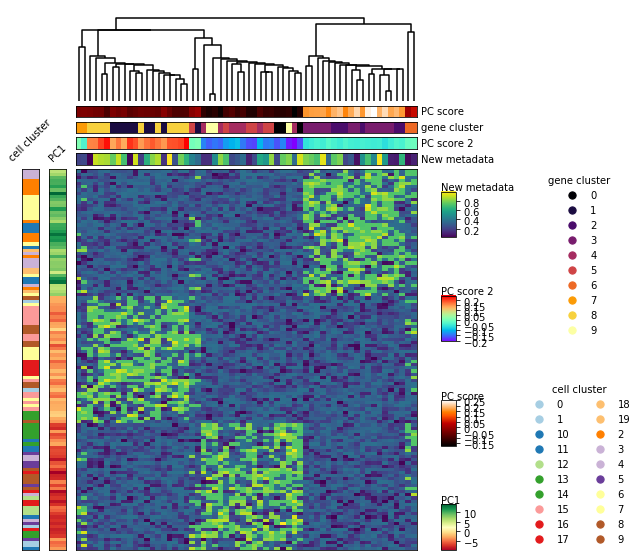

In [12]:
g = nhm(data=df, dfr=dfr, dfc=dfc, figsize=(10, 10), linewidths=0, cmaps=cmaps, showxticks=False)
g.hcluster(showRdendrogram=False)
fig, plots = g.run()